# Example: D-optimal experiment design with LIBSVM datasets
Solve the D-Optimal experiment design problem
$$
\begin{array}{ll}
\textrm{minimize}   & F(x):=\log\left(\det\left(\sum_{i=1}^n x_i V_i V_i^T\right)\right) \\
\textrm{subject to} & \sum_{i=1}^n x_i = 1, \\ 
                    & x_i\geq 0, \quad i=1,\ldots,n
\end{array}
$$
where $V_i\in R^m$ for $i=1,\ldots,n$.

In [23]:
%cd C:\\github\accbpg
# This should be removed after install accbpg using pip

C:\github\accbpg


In [24]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 14, 'font.family': 'serif'})
#matplotlib.rcParams.update({'text.usetex': True})

### Compare BPG and ABPG with different values of gamma

In [61]:
# import accbpg
import imp
imp.reload(accbpg.applications)
imp.reload(accbpg)


# Generate a D-optimal design problem from LIBSVM regression dataset

#filename = "data\\abalone.txt"
#filename = "data\\abalone_scale.txt"
filename = "data\\bodyfat.txt"
#filename = "data\\bodyfat_scale.txt"
#filename = "data\\housing.txt"
#filename = "data\\housing_scale.txt"
#filename = "data\\mpg.txt"
#filename = "data\\mpg_scale.txt"

f, h, L, x0 = accbpg.D_opt_libsvm(filename)

# Solve the problem using BPG and ABPG with different values of gamma (TSE) 
x00, F00, G00, T00 = accbpg.BPG( f, h, L, x0, maxitrs=5000, linesearch=False, ls_ratio=1.2, verbskip=1000)
x10, F10, G10, T10 = accbpg.ABPG(f, h, L, x0, gamma=1.0, maxitrs=5000, theta_eq=True, verbskip=1000)
x15, F15, G15, T15 = accbpg.ABPG(f, h, L, x0, gamma=1.5, maxitrs=5000, theta_eq=True, verbskip=1000)
x20, F20, G20, T20 = accbpg.ABPG(f, h, L, x0, gamma=2.0, maxitrs=5000, theta_eq=True, verbskip=1000)
x22, F22, G22, T22 = accbpg.ABPG(f, h, L, x0, gamma=2.2, maxitrs=5000, theta_eq=True, verbskip=1000)


BPG_LS method for min_{x in C} F(x) = f(x) + Psi(x)
     k      F(x)         Lk       time
     0  -3.475e+01   1.000e+00     0.0
  1000  -4.578e+01   1.000e+00     0.8
  2000  -4.588e+01   1.000e+00     1.5
  3000  -4.591e+01   1.000e+00     2.3
  4000  -4.593e+01   1.000e+00     3.0

ABPG method for minimize_{x in C} F(x) = f(x) + Psi(x)
     k      F(x)       theta        TSG       D(x+,y)     D(z+,z)     time
     0  -3.475e+01   1.000e+00   1.000e+00   6.732e-01   6.732e-01     0.0
  1000  -4.541e+01   9.990e-04   2.287e-03   1.012e-09   4.429e-04     0.9
  2000  -4.563e+01   4.998e-04   8.396e-04   8.927e-11   2.128e-04     1.8
  3000  -4.572e+01   3.332e-04   6.387e-04   2.623e-11   1.233e-04     2.7
  4000  -4.577e+01   2.499e-04   4.321e-04   4.983e-12   4.614e-05     3.5

ABPG method for minimize_{x in C} F(x) = f(x) + Psi(x)
     k      F(x)       theta        TSG       D(x+,y)     D(z+,z)     time
     0  -3.475e+01   1.000e+00   1.000e+00   6.732e-01   6.732e-01     0.0
 

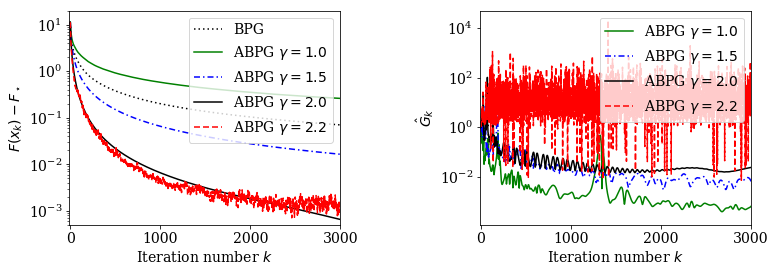

In [62]:
# Plot the objective gap and estimated gains for triangle scaling
plt.subplots(1, 2, figsize=(11, 4))

labels = [r"BPG", r"ABPG $\gamma=1.0$", r"ABPG $\gamma=1.5$", r"ABPG $\gamma=2.0$", r"ABPG $\gamma=2.2$"]
styles = ['k:', 'g-', 'b-.', 'k-', 'r--']
dashes = [[1,2], [], [4,2,1,2], [], [4,2]]

ax1 = plt.subplot(1, 2, 1)
y_vals = [F00, F10, F15, F20, F22]
accbpg.plot_comparisons(ax1, y_vals, labels, x_vals=[], plotdiff=True, yscale="log", xlim=[-10, 3000], ylim=[5e-4, 20], 
                        xlabel=r"Iteration number $k$", ylabel=r"$F(x_k)-F_\star$", legendloc="upper right", 
                        linestyles=styles, linedash=dashes)

ax2 = plt.subplot(1, 2, 2)
y_vals = [G10, G15, G20, G22]
accbpg.plot_comparisons(ax2, y_vals, labels[1:], x_vals=[], plotdiff=False, yscale="log", xlim=[-10, 3000], ylim=[], 
                        xlabel=r"Iteration number $k$", ylabel=r'$\hat{G}_k$', legendloc="upper right", 
                        linestyles=styles[1:], linedash=dashes[1:])

plt.tight_layout(w_pad=4)
plt.show()

### Comparing BPG with line search and adaptive ABPG algorithms

In [65]:
# Solve the problem using BPG w/o line seach and adaptive ABPG with gamma=2 (TSE) 
x00, F00, G00, T00 = accbpg.BPG( f, h, L, x0, maxitrs=5000, linesearch=False, verbskip=1000)
xLS, FLS, GLS, TLS = accbpg.BPG( f, h, L, x0, maxitrs=5000, linesearch=True, ls_ratio=1.2, verbskip=1000)
x20, F20, G20, T20 = accbpg.ABPG(f, h, L, x0, gamma=2.0, maxitrs=5000, theta_eq=True, verbskip=1000)
x2e, F2e, Gamma2e, G2e, T2e = accbpg.ABPG_expo(f, h, L, x0, gamma0=3, maxitrs=5000, theta_eq=True, Gmargin=100, verbskip=1000)
x2g, F2g, G2g, Gdiv2g, Gavg2g, T2g = accbpg.ABPG_gain(f, h, L, x0, gamma=2, maxitrs=5000, G0=0.1, theta_eq=True, verbskip=1000)


BPG_LS method for min_{x in C} F(x) = f(x) + Psi(x)
     k      F(x)         Lk       time
     0  -3.475e+01   1.000e+00     0.0
  1000  -4.578e+01   1.000e+00     0.8
  2000  -4.588e+01   1.000e+00     1.5
  3000  -4.591e+01   1.000e+00     2.3
  4000  -4.593e+01   1.000e+00     3.0

BPG_LS method for min_{x in C} F(x) = f(x) + Psi(x)
     k      F(x)         Lk       time
     0  -3.475e+01   8.333e-01     0.0
  1000  -4.589e+01   4.019e-01     1.6
  2000  -4.593e+01   4.019e-01     3.2
  3000  -4.595e+01   4.823e-01     4.8
  4000  -4.596e+01   5.787e-01     6.4

ABPG method for minimize_{x in C} F(x) = f(x) + Psi(x)
     k      F(x)       theta        TSG       D(x+,y)     D(z+,z)     time
     0  -3.475e+01   1.000e+00   1.000e+00   6.732e-01   6.732e-01     0.0
  1000  -4.597e+01   1.992e-03   2.439e-02   4.222e-11   4.362e-04     0.9
  2000  -4.598e+01   1.000e-03   1.813e-02   1.981e-12   1.092e-04     1.7
  3000  -4.598e+01   1.000e-03   2.343e-02   6.426e-13   2.743e-05    

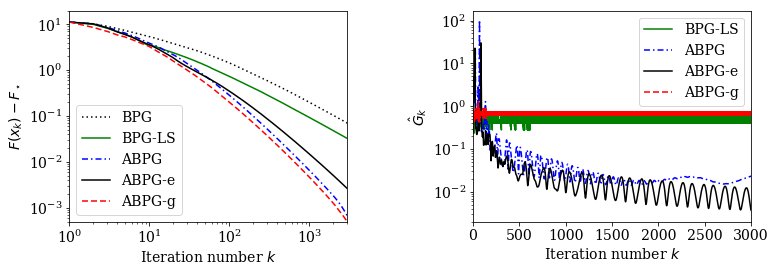

In [66]:
# Plot the objective gap and estimated gains for triangle scaling
plt.subplots(1, 2, figsize=(11, 4))

labels = [r"BPG", r"BPG-LS", r"ABPG", r"ABPG-e", r"ABPG-g"]
styles = ['k:', 'g-', 'b-.', 'k-', 'r--']
dashes = [[1,2], [], [4,2,1,2], [], [4,2]]

ax1 = plt.subplot(1, 2, 1)
y_vals = [F00, FLS, F20, F2e, F2g]
accbpg.plot_comparisons(ax1, y_vals, labels, x_vals=[], plotdiff=True, yscale="log", xscale="log", xlim=[1, 3000], ylim=[5e-4, 20], 
                        xlabel=r"Iteration number $k$", ylabel=r"$F(x_k)-F_\star$", legendloc="lower left", 
                        linestyles=styles, linedash=dashes)

ax2 = plt.subplot(1, 2, 2)
y_vals = [GLS, G20, G2e, G2g]
accbpg.plot_comparisons(ax2, y_vals, labels[1:], x_vals=[], plotdiff=False, yscale="log", xlim=[0, 3000], ylim=[], 
                        xlabel=r"Iteration number $k$", ylabel=r'$\hat{G}_k$', legendloc="upper right", 
                        linestyles=styles[1:], linedash=dashes[1:])

plt.tight_layout(w_pad=4)
plt.show()